#**Вариант 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import time

In [ ]:
# нужно, чтобы запустить анимацию в Colab
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
# объявление функций
def my_func(x):
  """Возвращает значение функции в заданной точке."""
  a_0 = 5 
  a_1 = 3
  a_2 = 7
  a_3 = 1
  return x ** 4 + a_3 * x ** 3 + a_2 * x ** 2 + a_1 * x + a_0

#Метод дихотомии

In [ ]:
# условие задачи
a, b = -3, 2
epsilon = 0.0001
delta = epsilon / 2
k = 0

# списки значений для визуализации
list_of_a = [] 
list_of_b = []
list_of_x1 = []
list_of_x2 = []

# реализация алгоритма
while True:
    k += 1
    x_1 = (a + b - delta) / 2
    x_2 = x_1 + delta
    f_1 = my_func(x_1)
    f_2 = my_func(x_2)
    epsilon_k = (b - a) / 2

    list_of_a.append(a)
    list_of_b.append(b)
    list_of_x1.append(x_1)
    list_of_x2.append(x_2)

    print(
        "k = %-3.d a = %-10.5f b = %-10.5f x1 = %-10.5f x2 = %-10.5f "
        "f(x1) = %-9.4f f(x2) = %-9.4f epsilon(k) = %-10.5f"
        % (k, a, b, x_1, x_2, f_1, f_2, epsilon_k)
    ) 

    if epsilon_k <= epsilon:
        break

    if f_1 <= f_2:
        b = x_2
    else:
        a = x_1

# расчет оценки минимума функции
x_min = (b + a) / 2
f_min = my_func(x_min)

# вывод результата оценки
print('\nКоличество итераций:', k)
print('Оценка x*:', round(x_min, 3))
print('Оценка f(x*):', round(f_min, 3))

k = 1   a = -3.00000   b = 2.00000    x1 = -0.50003   x2 = -0.49998   f(x1) = 5.1876    f(x2) = 5.1874    epsilon(k) = 2.50000   
k = 2   a = -0.50003   b = 2.00000    x1 = 0.74996    x2 = 0.75001    f(x1) = 11.9251   f(x2) = 11.9260   epsilon(k) = 1.25001   
k = 3   a = -0.50003   b = 0.75001    x1 = 0.12497    x2 = 0.12502    f(x1) = 5.4864    f(x2) = 5.4867    epsilon(k) = 0.62502   
k = 4   a = -0.50003   b = 0.12502    x1 = -0.18753   x2 = -0.18748   f(x1) = 4.6782    f(x2) = 4.6782    epsilon(k) = 0.31252   
k = 5   a = -0.50003   b = -0.18748   x1 = -0.34378   x2 = -0.34373   f(x1) = 4.7693    f(x2) = 4.7692    epsilon(k) = 0.15627   
k = 6   a = -0.34378   b = -0.18748   x1 = -0.26565   x2 = -0.26560   f(x1) = 4.6833    f(x2) = 4.6832    epsilon(k) = 0.07815   
k = 7   a = -0.26565   b = -0.18748   x1 = -0.22659   x2 = -0.22654   f(x1) = 4.6706    f(x2) = 4.6706    epsilon(k) = 0.03909   
k = 8   a = -0.22659   b = -0.18748   x1 = -0.20706   x2 = -0.20701   f(x1) = 4.6719    f(

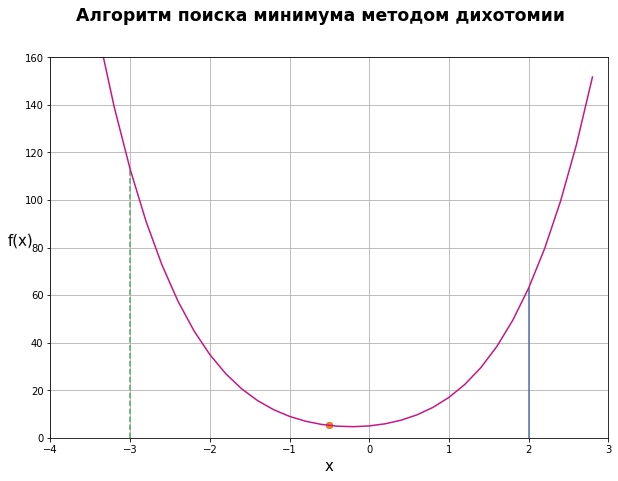

In [ ]:
# визуализация алгоритма
fig, ax = plt.subplots(figsize=(10, 7))
ax.axis([-4, 3, 0, 160])
plt.grid()

fig.suptitle('Алгоритм поиска минимума методом дихотомии',
             fontsize='xx-large', fontweight='semibold'
            )
ax.set_xlabel('x', fontsize=15, fontweight=5)
ax.set_ylabel('f(x)', fontsize=15, fontweight=5, rotation=1)

x = np.arange(-4, 3, 0.2)
y = [my_func(i) for i in x]

ax.plot(x, y, color='mediumvioletred')
# ax.scatter(x_min, f_min, color='blue')


def animate(i):
    """
    Рисует границы интервала неопределенности и точки f(х1), f(х2) 
    на каждой итерации.
    """
    ax.vlines(list_of_a[i], 0, my_func(list_of_a[i]), linestyle='--', color='g')
    ax.vlines(list_of_b[i], 0, my_func(list_of_b[i]), linestyle='-', color='b')
    
    ax.scatter(list_of_x1[i], my_func(list_of_x1[i]))
    ax.scatter(list_of_x2[i], my_func(list_of_x2[i]))
    
    time.sleep(0.5)
    

ani = FuncAnimation(fig, animate, frames=k, interval=500, repeat=False)

sns.set_theme()

In [ ]:
ani

#Метод золотого сечения

In [ ]:
# условие задачи
a, b = -3, 2
epsilon = 0.0001
T = (3 - 5 ** 0.5) / 2
x_1 = a + T * (b - a)
x_2 = a + b - x_1
k = 0

# списки значений для визуализации
list_of_a = [] 
list_of_b = []
list_of_x1 = []
list_of_x2 = []

# реализация алгоритма
while True:
    k += 1
    f_1 = my_func(x_1)
    f_2 = my_func(x_2)
    l = b - a
    
    list_of_a.append(a)
    list_of_b.append(b)
    list_of_x1.append(x_1)
    list_of_x2.append(x_2)
    
    print(
        "k = %-3.d a = %-10.5f b = %-10.5f x1 = %-10.5f x2 = %-10.5f "
        "f(x1) = %-9.4f f(x2) = %-9.4f l = %-10.5f"
        % (k, a, b, x_1, x_2, f_1, f_2, l)
    )

    if l <= epsilon:
        break

    if f_1 <= f_2:
        b = x_2
        x_2 = x_1
        x_1 = a + b - x_2
    else:
        a = x_1
        x_1 = x_2
        x_2 = a + b - x_1

# расчет оценки минимума функции
x_min = (a + b) / 2
f_min = my_func(x_min)

# вывод результата оценки
print('\nКоличество итераций:', k)
print('Оценка x*:', round(x_min, 3))
print('Оценка f(x*):', round(f_min, 3))

k = 1   a = -3.00000   b = 2.00000    x1 = -1.09017   x2 = 0.09017    f(x1) = 10.1656   f(x2) = 5.3282    l = 5.00000   
k = 2   a = -1.09017   b = 2.00000    x1 = 0.09017    x2 = 0.81966    f(x1) = 5.3282    f(x2) = 13.1639   l = 3.09017   
k = 3   a = -1.09017   b = 0.81966    x1 = -0.36068   x2 = 0.09017    f(x1) = 4.7986    f(x2) = 5.3282    l = 1.90983   
k = 4   a = -1.09017   b = 0.09017    x1 = -0.63932   x2 = -0.36068   f(x1) = 5.8489    f(x2) = 4.7986    l = 1.18034   
k = 5   a = -0.63932   b = 0.09017    x1 = -0.36068   x2 = -0.18847   f(x1) = 4.7986    f(x2) = 4.6778    l = 0.72949   
k = 6   a = -0.36068   b = 0.09017    x1 = -0.18847   x2 = -0.08204   f(x1) = 4.6778    f(x2) = 4.8005    l = 0.45085   
k = 7   a = -0.36068   b = -0.08204   x1 = -0.25425   x2 = -0.18847   f(x1) = 4.6775    f(x2) = 4.6778    l = 0.27864   
k = 8   a = -0.36068   b = -0.18847   x1 = -0.29490   x2 = -0.25425   f(x1) = 4.7060    f(x2) = 4.6775    l = 0.17221   
k = 9   a = -0.29490   b = -0.18

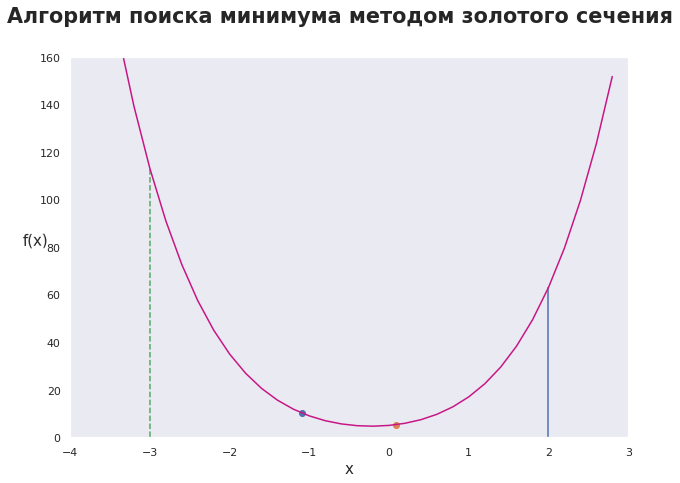

In [ ]:
# визуализация алгоритма
fig, ax = plt.subplots(figsize=(10, 7))
ax.axis([-4, 3, 0, 160])
plt.grid()

fig.suptitle('Алгоритм поиска минимума методом золотого сечения',
             fontsize='xx-large', fontweight='semibold'
            )
ax.set_xlabel('x', fontsize=15, fontweight=5)
ax.set_ylabel('f(x)', fontsize=15, fontweight=5, rotation=1)

x = np.arange(-4, 3, 0.2)
y = [my_func(i) for i in x]

ax.plot(x, y, color='mediumvioletred')
# ax.scatter(x_min, f_min, color='blue')


def animate(i):
    """
    Рисует границы интервала неопределенности и точки f(х1), f(х2) 
    на каждой итерации.
    """
    ax.vlines(list_of_a[i], 0, my_func(list_of_a[i]), linestyle='--', color='g')
    ax.vlines(list_of_b[i], 0, my_func(list_of_b[i]), linestyle='-', color='b')
    
    ax.scatter(list_of_x1[i], my_func(list_of_x1[i]))
    ax.scatter(list_of_x2[i], my_func(list_of_x2[i]))
    
    time.sleep(0.5)
    

ani = FuncAnimation(fig, animate, frames=k, interval=500, repeat=False)

sns.set_theme()
plt.show()

In [ ]:
ani